In [43]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [44]:
df = pd.read_csv('data/multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [45]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [46]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


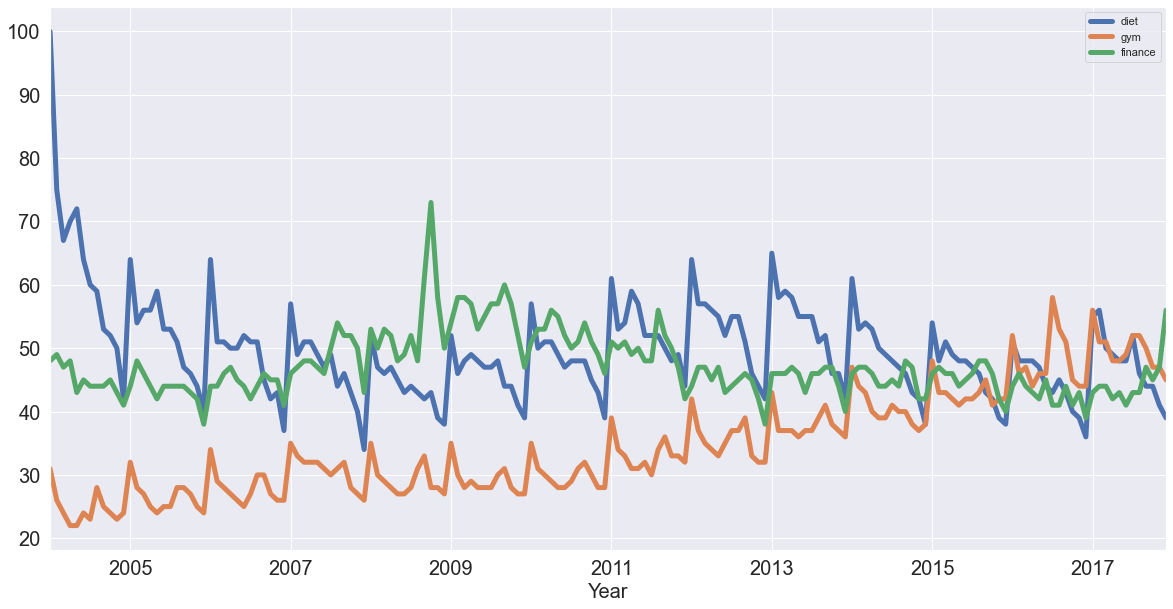

In [47]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

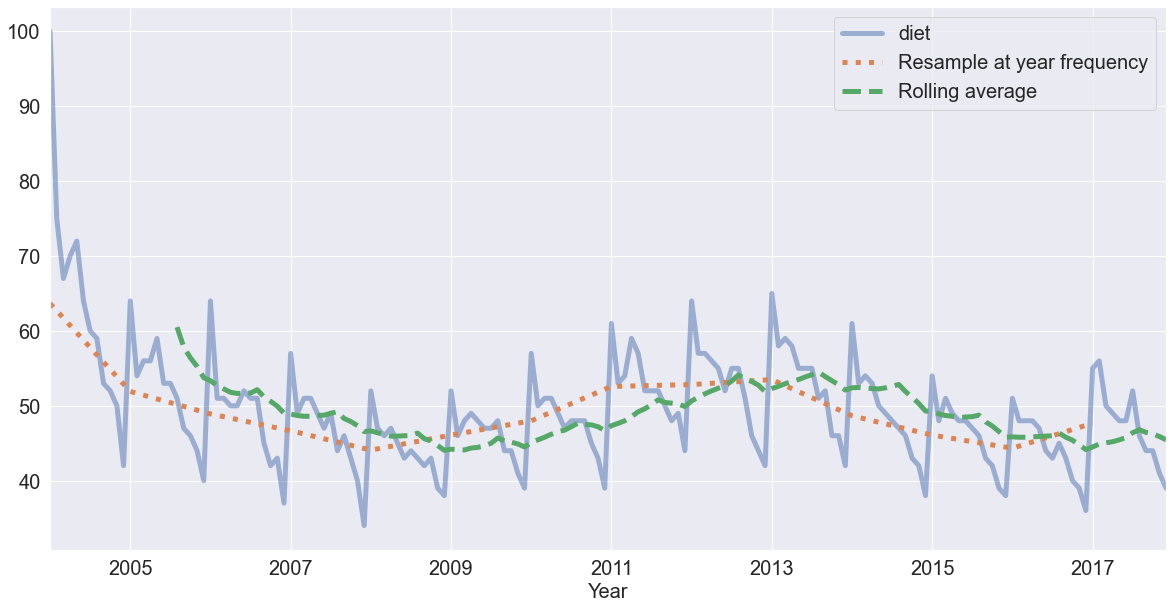

In [58]:
diet = df['diet']
diet_resample = diet.resample('A').mean()
diet_rolling = diet.rolling(20).mean()

ax = diet.plot(figsize=(20,10), linewidth=5, fontsize=20, alpha=0.5, style='-')
diet_resample.plot(style=':', linewidth=5, label='Resample at year frequency', ax=ax)
diet_rolling.plot(style='--', linewidth=5, label='Rolling average', ax=ax)
ax.legend(fontsize=20)
# diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
# diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Text(0.5, 0, 'Year')

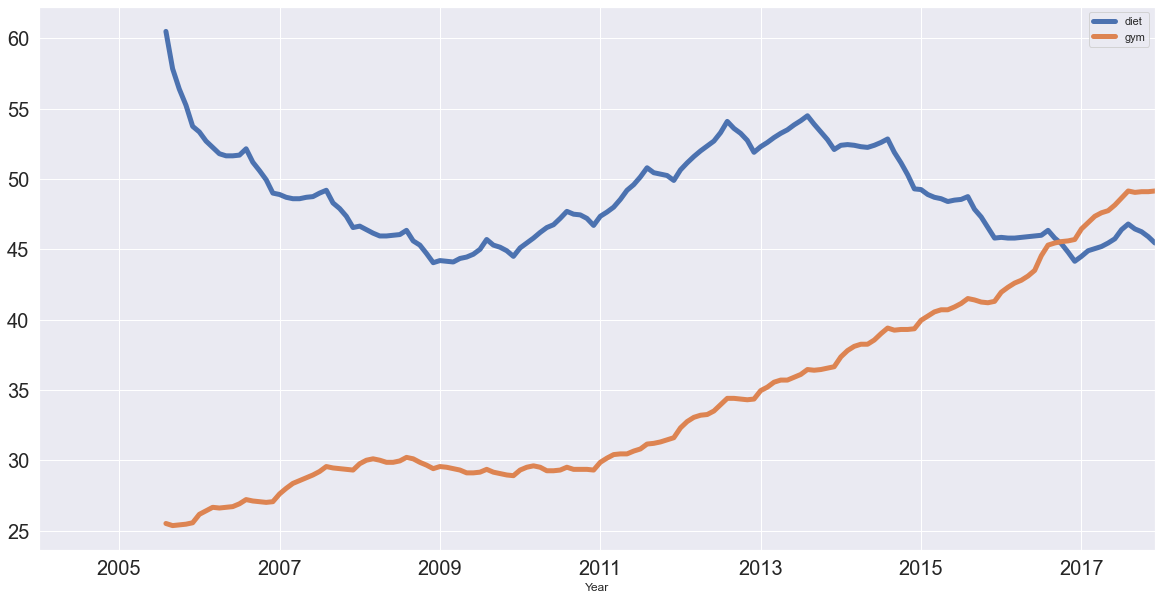

In [61]:
gym = df['gym']
df_average = pd.concat([diet.rolling(20).mean(), gym.rolling(20).mean()], axis=1)
df_average.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')

Text(0.5, 0, 'Year')

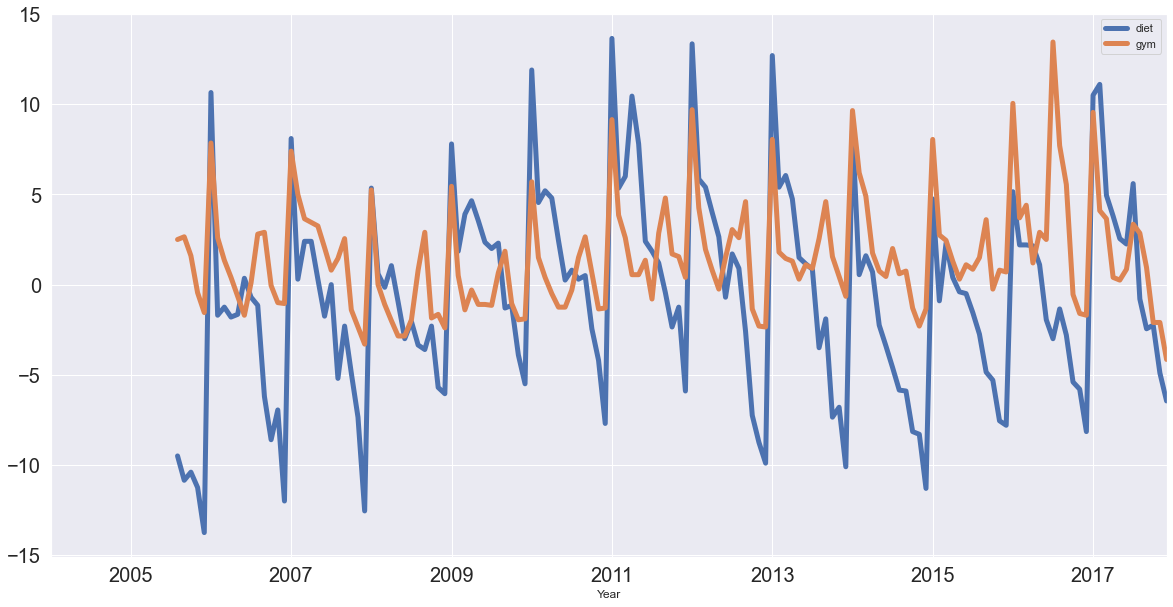

In [62]:
df_diff_trend = df[['diet', 'gym']] - df_average
df_diff_trend.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')